In [0]:
from google.colab import files    #to import files
import numpy as np               #to play with arrays
import csv                      #to upload and use csv files

In [5]:
files.upload()    #upload computer files

Saving sign_mnist_test.csv to sign_mnist_test.csv


KeyboardInterrupt: ignored

In [0]:
def read_data(file_name):
  with open(file_name) as filename:
    csv_file=csv.reader(filename,delimiter=',')   #read csv file and define end of data by ','
    temp_labels=[]                                #array to store labels
    temp_images=[]                                 #array to store images
    first_line=True                              #create a dummy to ignore first line ie.header
    for row in csv_file:
      if first_line:
        first_line=False
        print("Ignoring First row")
      else:
        temp_labels.append(row[0])                    #row[0] contains labels
        image_data=row[1:785]                         #row[1:785] contians 784 pixel images
        image_as_array=np.array_split(image_data,28)    #split the array using array_split to 28x28
        temp_images.append(image_as_array)              #append the 28x28 to images
    labels=np.array(temp_labels).astype('float')         #convert to array and store as float (astype)
    images=np.array(temp_images).astype('float')
    return images,labels

training_images,training_labels=read_data('sign_mnist_train.csv')    #split training and testing images and labels
test_images,test_labels=read_data('sign_mnist_test.csv')

Ignoring First row
Ignoring First row


In [0]:
print(training_labels.shape)           
print(training_images.shape)

print(test_labels.shape)
print(test_images.shape)


(27455,)
(27455, 28, 28)
(7172,)
(7172, 28, 28)


In [0]:
training_images=np.expand_dims(training_images,axis=3)                #expand dimensions of training and testing images
test_images=np.expand_dims(test_images,axis=3)

from tensorflow.keras.preprocessing.image import ImageDataGenerator


#add augmentation
train_generator=ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#train data generator
test_generator=ImageDataGenerator(
    rescale=1.0/255.0
)

print(training_images.shape)
print(test_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
import tensorflow as tf

In [0]:
model=tf.keras.models.Sequential([
                                  #1st Convolution
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPool2D((2,2)),              #maxpool
                                  #2nd conv
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  #flatten layer
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.1),
                                 
                                  #128 units hidden layer
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  #output layer
                                  tf.keras.layers.Dense(26,activation='softmax')

])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [0]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train the model

history=model.fit_generator(train_generator.flow(training_images,training_labels,batch_size=32),
                            steps_per_epoch=len(training_images)/32,
                            epochs=50,
                            validation_data=test_generator.flow(test_images,test_labels,batch_size=32),
                            validation_steps=len(test_images)/32
                            )
model.evaluate(test_images,test_labels)

Epoch 1/50
858/857 [==============================] - 11s 12ms/step - loss: 2.7651 - acc: 0.1632 - val_loss: 1.9066 - val_acc: 0.3896
Epoch 2/50
858/857 [==============================] - 10s 12ms/step - loss: 2.1262 - acc: 0.3333 - val_loss: 1.5405 - val_acc: 0.4695
Epoch 3/50
858/857 [==============================] - 10s 12ms/step - loss: 1.7093 - acc: 0.4598 - val_loss: 1.0028 - val_acc: 0.6753
Epoch 4/50
858/857 [==============================] - 10s 12ms/step - loss: 1.4249 - acc: 0.5380 - val_loss: 0.9535 - val_acc: 0.6969
Epoch 5/50
858/857 [==============================] - 10s 12ms/step - loss: 1.2141 - acc: 0.6056 - val_loss: 0.6043 - val_acc: 0.8139
Epoch 6/50
858/857 [==============================] - 10s 12ms/step - loss: 1.0812 - acc: 0.6463 - val_loss: 0.5551 - val_acc: 0.8271
Epoch 7/50
858/857 [==============================] - 10s 12ms/step - loss: 0.9771 - acc: 0.6802 - val_loss: 0.5154 - val_acc: 0.8153
Epoch 8/50
858/857 [==============================] - 10s 12ms

[391.18059332571545, 0.5436419]

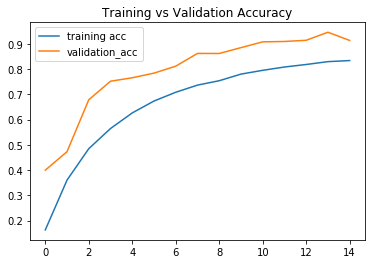

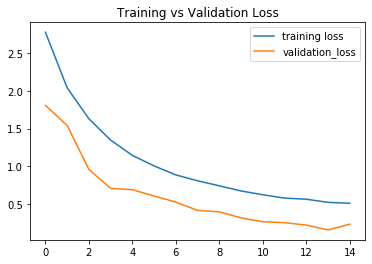

In [0]:
#to plot training vs testing accuracy and loss
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,label='training acc')
plt.plot(epochs,val_acc,label='validation_acc')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
plt.figure()

plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation_loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()